# Time Series Forecasting of Stock Market Data with ARIMA in Python

## 1. Time Series Data

`Time series` data is a type of data that is collected over time at regular intervals. It is a sequence of data points that are ordered chronologically and can be used to analyze trends, patterns, and behaviors over time. Time series data can be collected from a variety of sources, such as sensors, financial markets, weather stations, and social media platforms.

Examples of time series data include stock prices, temperature readings, website traffic, and sales data. Time series data can be analyzed using various statistical and machine learning techniques, such as regression analysis, ARIMA models, and deep learning models.

Time series data is often used in forecasting and prediction applications, where the goal is to predict future values based on past observations. Time series analysis can also be used to identify anomalies, trends, and seasonality in the data, which can provide insights into the underlying processes that generate the data.

`Overall`, time series data is an important type of data that is used in many different fields, including finance, economics, engineering, and social sciences.

- Time series data is a sequence of data points collected over time that can be used to analyze trends and patterns. It can be collected from various sources
and analyzed using statistical and machine learning techniques.
- Time series forecasting is the process of predicting future CLoses based on past observations. Time series data is used in many different fields,
including finance, economics, engineering, and social sciences.

## Stock Market Data scraping in Python

In [2]:
# importing libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
# define date to fetch the data
today = date.today()
d1 = today.strftime('%Y-%m-%d')
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime('%Y-%m-%d')
start_date = d2

print("Your data will be between these dates:",start_date , end_date)

Your data will be between these dates: 2024-01-24 2025-01-23


In [4]:
# define ticker

ticker = "GOOGL"
df = yf.download(tickers=ticker,start=start_date,end=end_date,progress=False)
df.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2024-01-24,148.162903,149.308758,147.565079,148.003477,25233500
2024-01-25,151.321442,152.497187,148.999856,149.527955,29149100
2024-01-26,151.640289,151.989016,150.464544,150.554230,26115500
2024-01-29,152.955521,153.224550,150.883032,151.510761,27784300
2024-01-30,150.912933,153.065120,150.643904,152.248090,36331800


In [8]:
df.columns = df.columns.get_level_values(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-01-24 to 2025-01-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   250 non-null    float64
 1   High    250 non-null    float64
 2   Low     250 non-null    float64
 3   Open    250 non-null    float64
 4   Volume  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


Adding the date column in start

In [10]:
df.insert(0,'Date',df.index,True)
# df["Date"] = df.index
df.reset_index(drop=True,inplace=True)
df.head()

Price,Date,Close,High,Low,Open,Volume
0,2024-01-24,148.162903,149.308758,147.565079,148.003477,25233500
1,2024-01-25,151.321442,152.497187,148.999856,149.527955,29149100
2,2024-01-26,151.640289,151.989016,150.464544,150.554230,26115500
3,2024-01-29,152.955521,153.224550,150.883032,151.510761,27784300
4,2024-01-30,150.912933,153.065120,150.643904,152.248090,36331800


In [11]:
df.describe()

Price,Date,Close,High,Low,Open,Volume
count,250,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,2024-07-22 05:16:48,166.344438,168.050390,164.665912,166.296414,2.745271e+07
min,2024-01-24 00:00:00,130.925369,132.758744,130.198020,131.403656,1.024210e+07
25%,2024-04-23 06:00:00,155.478870,157.163053,154.039100,155.320597,2.030018e+07
50%,2024-07-23 12:00:00,166.133385,167.512766,163.954284,166.129323,2.417975e+07
75%,2024-10-20 06:00:00,176.160927,177.499033,174.313972,176.196267,3.129115e+07
max,2025-01-22 00:00:00,198.369995,202.289993,197.869995,199.070007,7.191000e+07
std,NaN,15.829003,16.057721,15.671382,15.807794,1.134827e+07


In [12]:
fig = px.line(df,x='Date',y=df.columns,title="Google Stock price")
fig.show()

In [13]:
df = df[["Date","Close"]]
df.head()

Price,Date,Close
0,2024-01-24,148.162903
1,2024-01-25,151.321442
2,2024-01-26,151.640289
3,2024-01-29,152.955521
4,2024-01-30,150.912933


In [14]:
fig = px.line(df,x='Date',y='Close',title="Google Stock price")
fig.show()

In [15]:
# stationarity check on data
from statsmodels.tsa.stattools import adfuller
def stationarity_check(df):
    result = adfuller(df)
    print("ADF Statistics %f",result[0])
    print("p-value %f",result[1])
    if result[1] <0.05:
        print("Reject the null hypothesis. Data is stationary")
    else:
        print("Fail to reject the null hypothesis. Data is not stationary")
        
stationarity_check(df["Close"])

ADF Statistics %f -1.0033842589397366
p-value %f 0.7520279700206731
Fail to reject the null hypothesis. Data is not stationary


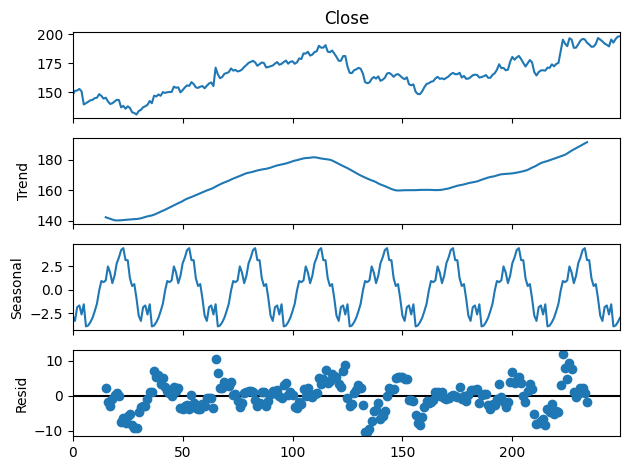

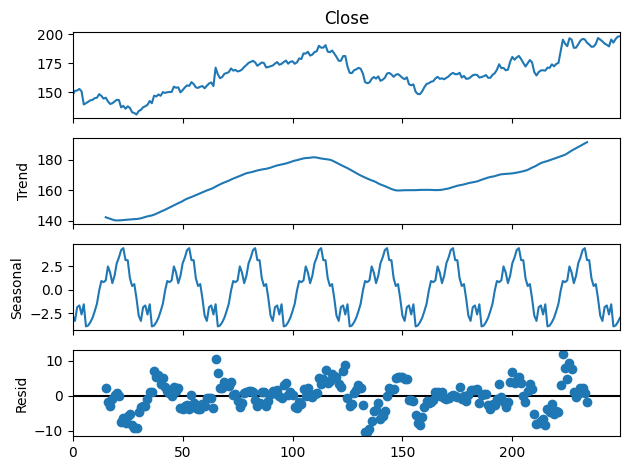

In [16]:
# decompose the data to see the trend, seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df["Close"],model="additive",period=30)
decompose.plot()

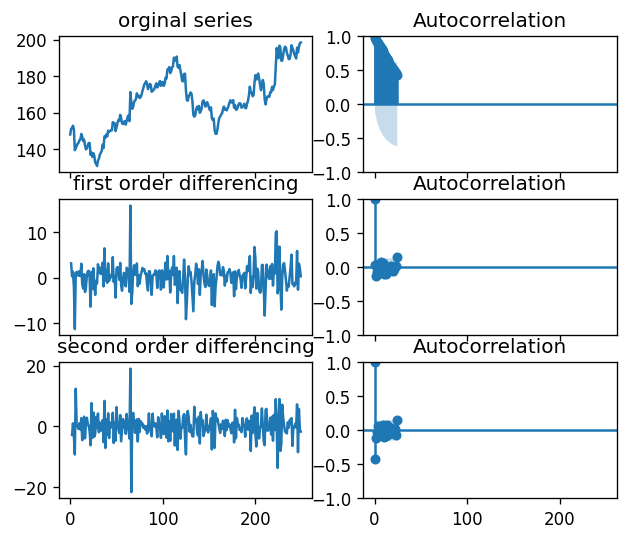

In [17]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({"figure.figsize":(6,5), 'figure.dpi':120})


fig, axes = plt.subplots(3,2,sharex=True)
axes[0,0].plot(df["Close"]); axes[0,0].set_title('orginal series')
plot_acf(df.Close, ax=axes[0,1])

axes[1,0].plot(df["Close"].diff()); axes[1,0].set_title('first order differencing')
plot_acf(df.Close.diff().dropna(), ax=axes[1,1])

axes[2,0].plot(df["Close"].diff().diff()); axes[2,0].set_title('second order differencing')
plot_acf(df.Close.diff().diff().dropna(), ax=axes[2,1])

plt.show()

`d = 1`

### Let's find `p` value

for finding p value check how many values are greater than 95% that will be p value

In [18]:
# plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# pd.plotting.autocorrelation_plot (df ( 'Close'] )

# plot_acf(df["Close"],alpha=0.05)

from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df["Close"]))
print(x_acf)

           0
0   1.000000
1   0.971680
2   0.942909
3   0.919315
4   0.900200
5   0.878639
6   0.857167
7   0.833625
8   0.807075
9   0.777682
10  0.745476
11  0.715993
12  0.690507
13  0.670608
14  0.649822
15  0.628307
16  0.606531
17  0.584162
18  0.560807
19  0.537290
20  0.515896
21  0.498045
22  0.481013
23  0.457517


`p = 2`

### Let's find `q` value

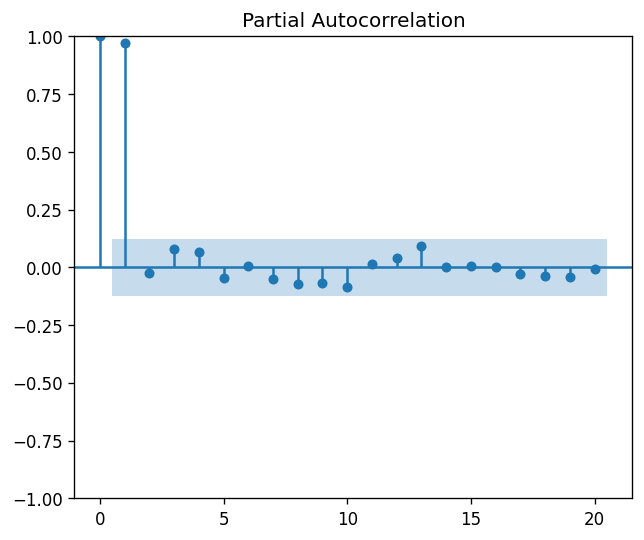

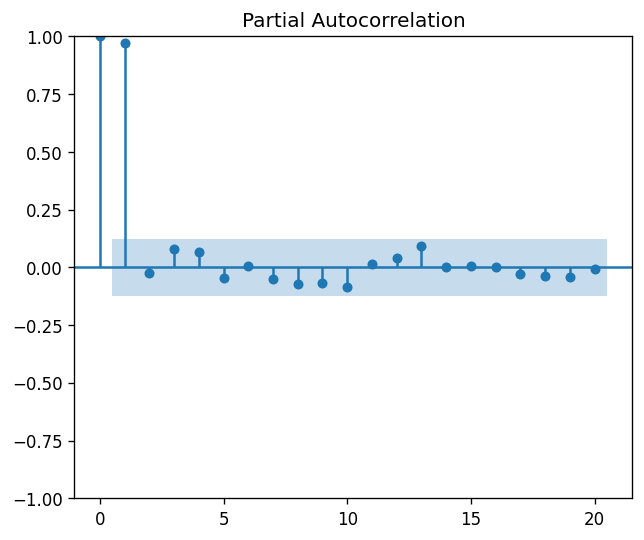

In [19]:
from statsmodels.tsa.stattools import acf, pacf
plot_pacf(df["Close"],lags=20,alpha=0.05)

`q = 2`

In [20]:
# lets define p,q,d
p =2
d=1
q=2

In [21]:
# lets run arima with pmdarima
from pmdarima.arima import auto_arima

model = auto_arima(df['Close'], start_p=1, start_q=1, max_p=2, max_q=2, start_P=0, m=12, seasonal=True, d=1, D=2, trace=True, error_action="ignore", suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,2,1)[12]             : AIC=inf, Time=2.21 sec
 ARIMA(0,1,0)(0,2,0)[12]             : AIC=1570.926, Time=0.04 sec
 ARIMA(1,1,0)(1,2,0)[12]             : AIC=1379.070, Time=0.30 sec
 ARIMA(0,1,1)(0,2,1)[12]             : AIC=inf, Time=1.55 sec
 ARIMA(1,1,0)(0,2,0)[12]             : AIC=1572.103, Time=0.04 sec
 ARIMA(1,1,0)(2,2,0)[12]             : AIC=1322.634, Time=0.57 sec
 ARIMA(1,1,0)(2,2,1)[12]             : AIC=inf, Time=3.64 sec
 ARIMA(1,1,0)(1,2,1)[12]             : AIC=inf, Time=2.09 sec
 ARIMA(0,1,0)(2,2,0)[12]             : AIC=1320.945, Time=0.42 sec
 ARIMA(0,1,0)(1,2,0)[12]             : AIC=1377.889, Time=0.32 sec
 ARIMA(0,1,0)(2,2,1)[12]             : AIC=inf, Time=4.09 sec
 ARIMA(0,1,0)(1,2,1)[12]             : AIC=inf, Time=2.45 sec
 ARIMA(0,1,1)(2,2,0)[12]             : AIC=1322.550, Time=0.86 sec
 ARIMA(1,1,1)(2,2,0)[12]             : AIC=1324.026, Time=1.36 sec
 ARIMA(0,1,0)(2,2,0)[12] intercept   : AIC=1322.9

In [22]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  250
Model:             SARIMAX(0, 1, 0)x(2, 2, 0, 12)   Log Likelihood                -657.473
Date:                            Thu, 23 Jan 2025   AIC                           1320.945
Time:                                    13:41:13   BIC                           1331.194
Sample:                                         0   HQIC                          1325.082
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -1.1773      0.050    -23.691      0.000      -1.275      -1.080
ar.S.L24      -0.5315      0.067   

In [23]:
model = auto_arima(df['Close'], seasonal=True, suppress_warnings=True)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -623.291
Date:                Thu, 23 Jan 2025   AIC                           1248.581
Time:                        13:41:52   BIC                           1252.099
Sample:                             0   HQIC                          1249.997
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         8.7449      0.436     20.037      0.000       7.890       9.600
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):               205.57
Prob(Q):                              0.53   Pr

250    198.000375
251    197.776653
252    197.764233
253    197.830365
254    197.874050
255    197.878461
256    197.866737
257    197.858267
258    197.857049
259    197.859106
260    197.860738
261    197.861039
262    197.860682
263    197.860370
264    197.860300
265    197.860361
266    197.860420
267    197.860436
268    197.860426
269    197.860415
270    197.860411
271    197.860413
272    197.860415
273    197.860416
274    197.860415
275    197.860415
276    197.860415
277    197.860415
278    197.860415
279    197.860415
280    197.860415
Name: predicted_mean, dtype: float64


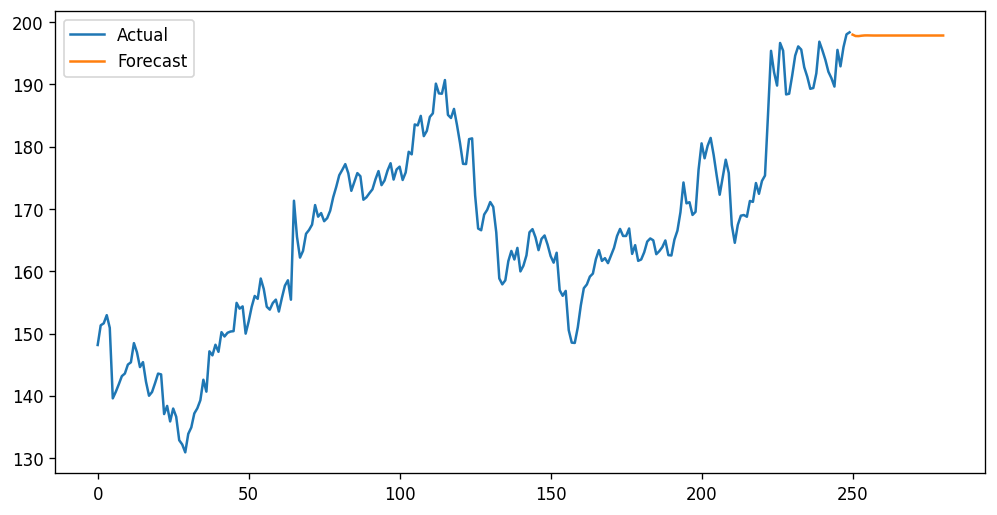

In [28]:
from statsmodels.tsa.arima.model import ARIMA

# Define the order of the ARIMA model
p, d, q = 2, 1, 2

# Fit the ARIMA model
model = ARIMA(df['Close'], order=(p, d, q))
model_fit = model.fit()

# Predict the next 30 days
forecast = model_fit.predict(start=len(df), end=len(df) + 30)
print(forecast)

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df["Close"], label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

c:\Users\Sumit Sharma\.conda\envs\tf_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



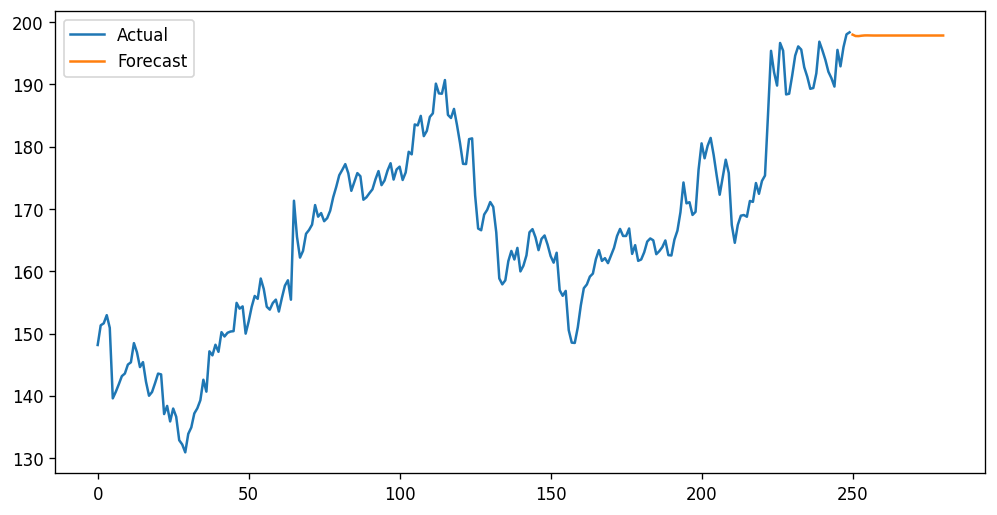

In [44]:
# let's run SARIMA
import statsmodels.api as sm
import warnings

p,d,q=2,1,2

model  = sm.tsa.statespace.SARIMAX(df["Close"],
                                   order=(p,d,q),
                                   seasonal_order=(p,d,q,12))

model = model.fit()
# model.summary()

# Predict the next 30 days
predictions = model_fit.predict(start=len(df['Close']), end=len(df['Close']) + 30)
# print(forecast)

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, label='Forecast')
plt.legend(loc="upper left")
plt.show()

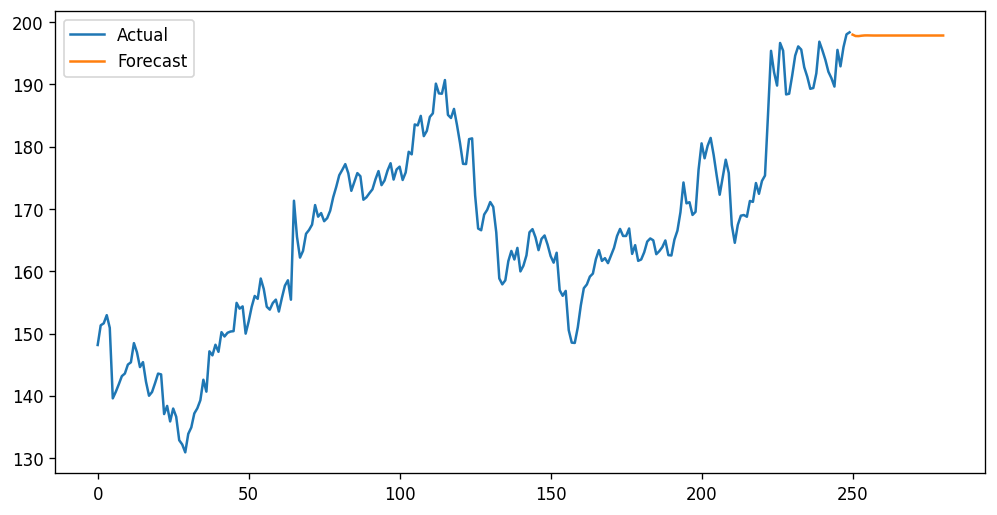

In [36]:

# Predict the next 30 days
predictions = model_fit.predict(start=len(df['Close']), end=len(df['Close']) + 30)
# print(forecast)

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, label='Forecast')
plt.legend(loc="upper left")
plt.show()